In [336]:
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [337]:
# Loading Data Set
data=pd.read_csv("./assets/Student_Performance.csv").head(10000).tail(100)
X=data.iloc[:,2]
Y=data.iloc[:,-5]
print(X.head())
print(Y.head())


9900    85.09
9901    90.34
9902    81.77
9903    87.63
9904    80.41
Name: Atten_Percent, dtype: float64
9900    78.04
9901    32.75
9902    56.70
9903    55.79
9904    52.40
Name: Final_Sc, dtype: float64


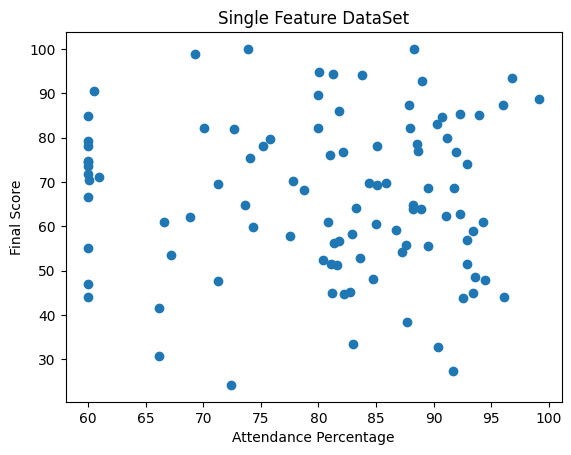

In [338]:
# Dataset plot scattered
# printing complete dataset
fig, plot_data_set = plt.subplots()
plot_data_set.set_title("Single Feature DataSet")
plot_data_set.set_xlabel("Attendance Percentage")
plot_data_set.set_ylabel("Final Score")
plot_data_set.scatter(X,Y,label="Data Points")

fig.savefig("./assets/student_single_feature_atd_vs_fscore.png", bbox_inches='tight')

plt.show()

In [339]:
# loading training data
training_data_size=len(X)
# features and lables
features=pd.DataFrame({
    "intercept Coeffecient":np.ones(training_data_size),
    "feature 1":X
})
labels=Y


# print features and labels
print("Total Features",len(features))
print(features)
print("label")
print("Label : ",type(labels),"length-",len(labels))
print(labels.head())



Total Features 100
      intercept Coeffecient  feature 1
9900                    1.0      85.09
9901                    1.0      90.34
9902                    1.0      81.77
9903                    1.0      87.63
9904                    1.0      80.41
...                     ...        ...
9995                    1.0      81.29
9996                    1.0      88.54
9997                    1.0      86.69
9998                    1.0      92.29
9999                    1.0      72.63

[100 rows x 2 columns]
label
Label :  <class 'pandas.Series'> length- 100
9900    78.04
9901    32.75
9902    56.70
9903    55.79
9904    52.40
Name: Final_Sc, dtype: float64


In [ ]:
# Model Training From Scratch - Gradient Descent
features_len=len(features.columns)
coefficient_vector=np.zeros(features_len)
coefficient_history=[]

learning_rate=0.00001

def hypothesis(
        coefficient_vector=None,
        feature_vector=None
        ):
    # print(coefficient_vector)
    # print(feature_vector)
    return np.dot(coefficient_vector,feature_vector)
    
# for i in range(training_data_size):
f_v=features.iloc[0].to_numpy()
l_v=labels.iloc[0]
# print(f_v)
# print(l_v)
# print(-1*learning_rate*(hypothesis(coefficient_vector,f_v)-l_v)*f_v[1])

# training
for i in range(training_data_size):
    # itteratin through features
    feature_v=features.iloc[i].to_numpy()
    label_v=labels.iloc[i]
    hypothesis_v=hypothesis(coefficient_vector,feature_v) # hpothesis
    # print(coefficient_vector)
    # t_vector=np.zeros(len(coefficient_vector))
    for fi in range(features_len):
        # update ith coefficient
        # print("---------")
        # print()
        # print(coefficient_vector[fi]+(((hypothesis_v-l_v)*f_v[fi])*learning_rate*-1))
        coefficient_vector[fi]=coefficient_vector[fi]-(((hypothesis_v-l_v)*f_v[fi])*learning_rate)
        # print(coefficient_vector[fi]-learning_rate*(((hypothesis_v)-l_v)*f_v[fi]))
    coefficient_history.append(coefficient_vector.copy())

print(coefficient_history)


[array([7.8040000e-05, 6.6404236e-03]), array([0.00015548, 0.0132298 ]), array([0.00023244, 0.01977816]), array([0.00030874, 0.02627108]), array([0.00038467, 0.03273173]), array([0.00046002, 0.03914324]), array([0.00053489, 0.04551337]), array([0.00060925, 0.05184076]), array([0.00068418, 0.05821646]), array([0.00075682, 0.06439817]), array([0.0008291 , 0.07054804]), array([0.00090137, 0.0766976 ]), array([0.00097242, 0.08274321]), array([0.00104542, 0.08895471]), array([0.0011152 , 0.09489194]), array([0.0011867 , 0.10097635]), array([0.00125727, 0.10698069]), array([0.00132522, 0.11276269]), array([0.00139649, 0.1188273 ]), array([0.00146342, 0.12452273]), array([0.00153399, 0.13052729]), array([0.00160041, 0.13617921]), array([0.00166738, 0.1418772 ]), array([0.00173531, 0.14765745]), array([0.00180013, 0.15317286]), array([0.00186412, 0.15861796]), array([0.00192931, 0.16416471]), array([0.00199219, 0.16951565]), array([0.00205902, 0.1752019 ]), array([0.00212528, 0.18083989]), arr

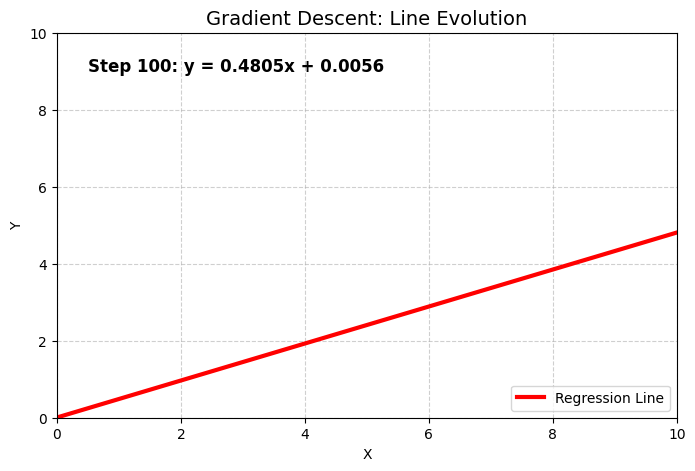

In [341]:
# 2. Setup Plot
fig, ax = plt.subplots(figsize=(8, 5))
x_vals = np.linspace(0, 10, 100) # Range of your X data
line, = ax.plot([], [], color='red', lw=3, label='Regression Line')
text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize=12, fontweight='bold')

# Axis Setup
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Gradient Descent: Line Evolution', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.6)

# 3. Animation Functions
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

def update(frame):
    intercept, slope = coefficient_history[frame]
    y_vals = intercept + (slope * x_vals)
    line.set_data(x_vals, y_vals)
    text.set_text(f'Step {frame+1}: y = {slope:.4f}x + {intercept:.4f}')
    return line, text

# 4. Create and Save
ani = FuncAnimation(fig, update, frames=len(coefficient_history), 
                    init_func=init, blit=True, interval=50)

# Save as GIF (requires 'pillow' library: pip install pillow)
ani.save('./assets/regression_evolution_simple.gif', writer='pillow')
plt.show()